In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

In [3]:
diabetes = load_diabetes()

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

## Проверка и заполнение пропусков

In [5]:
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
target = diabetes.target

In [6]:
data.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [7]:
pd.Series(target).isnull().sum()

0

In [8]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


## Разделение выборки на тестовую и обучающую

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [10]:
X_train.shape, y_train.shape

((353, 10), (353,))

In [11]:
X_test.shape, y_test.shape

((89, 10), (89,))

## Обучение модели ближайших соседей

In [12]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

mse = np.mean((y_pred - y_test) ** 2)
mse

7182.067415730337

In [13]:
y_pred_base = y_pred

## Подбор гиперпараметра K
### Подбор гиперпараметра K с использованием GridSearchCV

In [17]:
from sklearn.model_selection import GridSearchCV
n_range = np.array(range(1, 50, 2))
param_grid = dict(n_neighbors=n_range)
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

In [18]:
grid_search.fit(X_train, y_train)

c:\Users\Родион\projects\tmo\lab2\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             scoring='neg_mean_squared_error')

In [19]:
grid_search.best_params_

{'n_neighbors': 35}

In [21]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
mse = np.mean((y_pred - y_test) ** 2)
mse

6607.662921348315

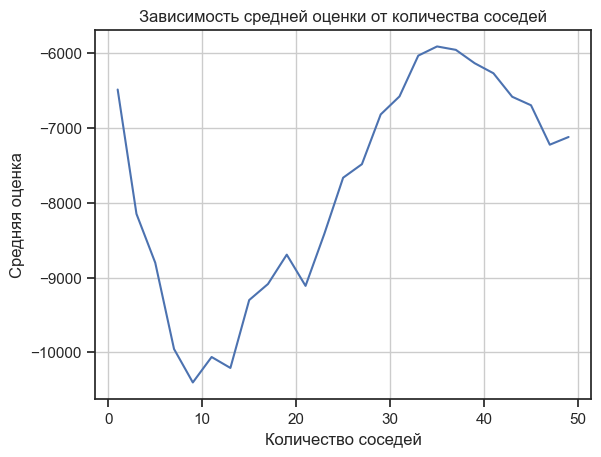

In [22]:
mean_test_scores = grid_search.cv_results_['mean_test_score']
plt.plot(n_range, mean_test_scores)
plt.title('Зависимость средней оценки от количества соседей')
plt.xlabel('Количество соседей')
plt.ylabel('Средняя оценка')
plt.grid(True)
plt.show()

## Подбор гиперпараметра K с использованием RandomizedSearchCV

In [23]:
from sklearn.model_selection import RandomizedSearchCV
n_range = np.array(range(1, 50, 2))
param_grid = dict(n_neighbors=n_range)
random_search = RandomizedSearchCV(knn, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error')

In [24]:
random_search.fit(X_train, y_train)

c:\Users\Родион\projects\tmo\lab2\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
                   scoring='neg_mean_squared_error')

In [25]:
random_search.best_params_

{'n_neighbors': 35}

In [26]:
best_knn = random_search.best_estimator_
y_pred = best_knn.predict(X_test)
mse = np.mean((y_pred - y_test) ** 2)
mse

6607.662921348315

## Сравнение метрик качества исходной и оптимальной моделей

### Метрика Среднеквадратичная абсолютная ошибка

In [29]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae_best = mean_absolute_error(y_test, y_pred_base)
print("Mean absolute error исходной модели: ", mae)
print("Mean absolute error модели с подобранным параметром: ", mae_best)

Mean absolute error исходной модели:  61.91011235955056
Mean absolute error модели с подобранным параметром:  66.49438202247191


### Метрика Среднеквадратичная ошибка

In [30]:
mse = np.mean((y_pred - y_test) ** 2)
mse_best = np.mean((y_pred_base - y_test) ** 2)
print("Mean squared error исходной модели: ", mse)
print("Mean squared error модели с подобранным параметром: ", mse_best)

Mean squared error исходной модели:  6607.662921348315
Mean squared error модели с подобранным параметром:  7182.067415730337


### Метрика R2

In [32]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2_best = r2_score(y_test, y_pred_base)
print("R2 исходной модели: ", r2)
print("R2 модели с подобранным параметром: ", r2_best)

R2 исходной модели:  -0.2471637723850313
R2 модели с подобранным параметром:  -0.3555797864304664
